# Python Programming: K-Nearest Neighbours (KNN): Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> We are to implement a naive bayes classifier. Once we conduct the experiments, we will calculate the resulting metrics. 

### b) Defining the Metric for Success

> For naive bayes, we will follow the best practices of optimization. This includes feature selection, splitting the data into subsets to use in modeling. 

### c) Understanding the context 

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter. 

### d) Recording the Experimental Design

1. Loading the datasets
2. Data Preparation
3. Investigating the dataset
4. Data cleaning
5. Exploratory Data Analysis(Univariate, Bivariate, Multivariate)
6. Modelling
7. Answering the question
8. Conclusion
9. Recommendation
10. Follow up questions

### e) Data Relevance

We will measure the relevance after doing analysis of the dataset.

## 2. Reading the Data

In [3]:
# impoerting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope

# Loading the Data from the source i.e. csv
# ---

df = pd.read_csv('/home/mirana/Downloads/core/week 9/spambase.data')



## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
#
df.count()

0         4600
0.64      4600
0.64.1    4600
0.1       4600
0.32      4600
0.2       4600
0.3       4600
0.4       4600
0.5       4600
0.6       4600
0.7       4600
0.64.2    4600
0.8       4600
0.9       4600
0.10      4600
0.32.1    4600
0.11      4600
1.29      4600
1.93      4600
0.12      4600
0.96      4600
0.13      4600
0.14      4600
0.15      4600
0.16      4600
0.17      4600
0.18      4600
0.19      4600
0.20      4600
0.21      4600
0.22      4600
0.23      4600
0.24      4600
0.25      4600
0.26      4600
0.27      4600
0.28      4600
0.29      4600
0.30      4600
0.31      4600
0.32.2    4600
0.33      4600
0.34      4600
0.35      4600
0.36      4600
0.37      4600
0.38      4600
0.39      4600
0.40      4600
0.41      4600
0.42      4600
0.778     4600
0.43      4600
0.44      4600
3.756     4600
61        4600
278       4600
1         4600
dtype: int64

In [5]:
# Previewing the top of our dataset
#
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [6]:
# Previewing the bottom of our dataset
# 
df.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [7]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

## 4. External Data Source Validation

> Spam filters are designed to identify incoming dangerous emails from attackers or marketers. Attackers often use emails that claim to offer a beneficial service or protect you from imminent danger, but they are really just clickbait, designed to get you to click on a link that downloads malicious software onto your computer or sends you to a dangerous site.

> Spam can also contain relatively harmless content but can clutter up your inbox, consuming valuable space and making it more difficult to identify important, useful emails. Spam filters can detect spam emails. These helpful tools can recognize patterns that spam emails tend to follow. 

In [8]:
df.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

### a.Validation

## 5. Tidying the Dataset

<AxesSubplot:>

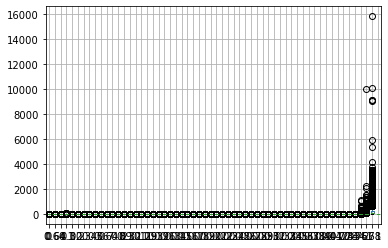

In [9]:
# outliers

df.boxplot()

In [10]:
# Checking for Anomalies
'''
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=1000, contamination=float(0.1))
isolation_forest.fit(df['Fare'].values.reshape(-1, 1))
df['anomaly_score_rate'] = isolation_forest.decision_function(df['Fare'].values.reshape(-1, 1))
df['anomaly'] = isolation_forest.predict(df['Fare'].values.reshape(-1, 1))
df.head()'''

"\nfrom sklearn.ensemble import IsolationForest\nisolation_forest = IsolationForest(n_estimators=1000, contamination=float(0.1))\nisolation_forest.fit(df['Fare'].values.reshape(-1, 1))\ndf['anomaly_score_rate'] = isolation_forest.decision_function(df['Fare'].values.reshape(-1, 1))\ndf['anomaly'] = isolation_forest.predict(df['Fare'].values.reshape(-1, 1))\ndf.head()"

In [11]:
# predicted anomaly
'''
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)'''

"\nanomaly=df.loc[df['anomaly']==-1]\nanomaly_index=list(anomaly.index)\nprint(anomaly)"

In [12]:
# Identifying the Missing Data
#
df.isnull().sum().sum()

0

In [13]:
# Dealing with the Missing Data
#
df.dropna(inplace=True)

In [14]:
# More data cleaning procedures
#

df.duplicated().sum()
df.drop_duplicates().head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [15]:
# confirming no missing values

df.isnull().sum().sum()

0

## 6. Exploratory Analysis

In [16]:
# Ploting the bivariate summaries and recording our observations
#
df.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [17]:
# pairplot 
'''import seaborn as sns

sns.pairplot(df)
plt.show()'''

'import seaborn as sns\n\nsns.pairplot(df)\nplt.show()'

In [18]:
# general correlation
df.corr()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,1.000000,-0.016735,0.065684,0.013270,0.023120,0.059650,0.007647,-0.003970,0.106241,0.041171,...,-0.026517,-0.021235,-0.033313,0.058342,0.117398,-0.008852,0.044488,0.061387,0.089165,0.126323
0.64,-0.016735,1.000000,-0.033579,-0.006920,-0.023761,-0.024815,0.003939,-0.016261,-0.003803,0.032989,...,-0.007270,-0.049802,-0.018516,-0.014506,-0.009584,0.001953,0.002086,0.000268,-0.022679,-0.030318
0.64.1,0.065684,-0.033579,1.000000,-0.020240,0.077737,0.087624,0.036725,0.012044,0.093843,0.032135,...,-0.033190,-0.016417,-0.033098,0.108054,0.087671,-0.003320,0.097410,0.107462,0.070119,0.196840
0.1,0.013270,-0.006920,-0.020240,1.000000,0.003238,-0.010018,0.019781,0.010265,-0.002458,-0.004951,...,-0.000592,-0.012376,-0.007150,-0.003132,0.010859,-0.000299,0.005260,0.022081,0.021369,0.057394
0.32,0.023120,-0.023761,0.077737,0.003238,1.000000,0.054055,0.147338,0.029599,0.020824,0.034497,...,-0.032759,-0.046361,-0.026389,0.025509,0.041583,0.002016,0.052662,0.052290,0.002492,0.241958
0.2,0.059650,-0.024815,0.087624,-0.010018,0.054055,1.000000,0.061142,0.079543,0.117416,0.013869,...,-0.019131,-0.008745,-0.015145,0.065094,0.105671,0.019887,-0.010282,0.090177,0.082089,0.232741
0.3,0.007647,0.003939,0.036725,0.019781,0.147338,0.061142,1.000000,0.044530,0.050767,0.056787,...,-0.033099,-0.051919,-0.027663,0.053748,0.070109,0.046606,0.041563,0.059680,-0.008344,0.332255
0.4,-0.003970,-0.016261,0.012044,0.010265,0.029599,0.079543,0.044530,1.000000,0.105285,0.083110,...,-0.027441,-0.032525,-0.019557,0.031491,0.057894,-0.008018,0.011251,0.037578,0.040252,0.206915
0.5,0.106241,-0.003803,0.093843,-0.002458,0.020824,0.117416,0.050767,0.105285,1.000000,0.130601,...,-0.014657,-0.031040,0.013591,0.043685,0.149347,-0.000530,0.111306,0.189252,0.248726,0.231680
0.6,0.041171,0.032989,0.032135,-0.004951,0.034497,0.013869,0.056787,0.083110,0.130601,1.000000,...,0.011933,0.003895,0.007345,0.036789,0.075763,0.044822,0.073674,0.103314,0.087274,0.139088


In [19]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


/tmp/ipykernel_18260/4269433385.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [20]:
# Drop features 
df.drop(df[to_drop], axis=1)


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [23]:
# Data Reduction
#




## 7. Implementing the Solution

In [24]:
# Importing our libraries 

# Importing pandas
import pandas as pd

# Importing numpy
import numpy as np

# tokenizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/mirana/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 8. Challenging the solution

In [25]:
# let us challenge our solution


In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?